In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
carona=pd.read_csv('covid_19_india.csv')

In [3]:
carona

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,1/30/2020,6:00 PM,Kerala,1,0,0,0,1
1,2,1/31/2020,6:00 PM,Kerala,1,0,0,0,1
2,3,2/1/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,2/3/2020,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,8/11/2021,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,8/11/2021,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,8/11/2021,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,8/11/2021,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [4]:
carona.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,1/30/2020,6:00 PM,Kerala,1,0,0,0,1
1,2,1/31/2020,6:00 PM,Kerala,1,0,0,0,1
2,3,2/1/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,2/3/2020,6:00 PM,Kerala,3,0,0,0,3


In [5]:
carona.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,8/11/2021,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,8/11/2021,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,8/11/2021,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,8/11/2021,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,8/11/2021,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [6]:
carona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [7]:
carona.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [8]:
carona.isnull().sum()

Sno                     0
Date                    0
Time                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64

In [9]:
carona[carona.duplicated()]

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed


In [10]:
carona.drop_duplicates(inplace=True)

In [11]:
carona.rename(columns={'State/UnionTerritory':'state'},inplace=True)

In [12]:
carona

,Sno,Date,Time,state,Cured,Deaths,Confirmed
0,1,1/30/2020,6:00 PM,Kerala,0,0,1
1,2,1/31/2020,6:00 PM,Kerala,0,0,1
2,3,2/1/2020,6:00 PM,Kerala,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,0,0,3
4,5,2/3/2020,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...,...
18105,18106,8/11/2021,8:00 AM,Telangana,638410,3831,650353
18106,18107,8/11/2021,8:00 AM,Tripura,77811,773,80660
18107,18108,8/11/2021,8:00 AM,Uttarakhand,334650,7368,342462
18108,18109,8/11/2021,8:00 AM,Uttar Pradesh,1685492,22775,1708812


In [13]:
carona.nunique()

Sno          18110
Date           560
Time             7
state           46
Cured        14445
Deaths        6471
Confirmed    14971
dtype: int64

In [14]:
carona['state'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [15]:
carona.nlargest(5,'Deaths')

,Sno,Date,Time,state,Cured,Deaths,Confirmed
18094,18095,8/11/2021,8:00 AM,Maharashtra,6159676,134201,6363442
18058,18059,8/10/2021,8:00 AM,Maharashtra,6151956,134064,6357833
18022,18023,8/9/2021,8:00 AM,Maharashtra,6144388,133996,6353328
17986,17987,8/8/2021,8:00 AM,Maharashtra,6139493,133845,6347820
17950,17951,8/7/2021,8:00 AM,Maharashtra,6130137,133717,6341759


In [16]:
carona.nsmallest(5,'Deaths')

,Sno,Date,Time,state,Cured,Deaths,Confirmed
0,1,1/30/2020,6:00 PM,Kerala,0,0,1
1,2,1/31/2020,6:00 PM,Kerala,0,0,1
2,3,2/1/2020,6:00 PM,Kerala,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,0,0,3
4,5,2/3/2020,6:00 PM,Kerala,0,0,3


<AxesSubplot:>

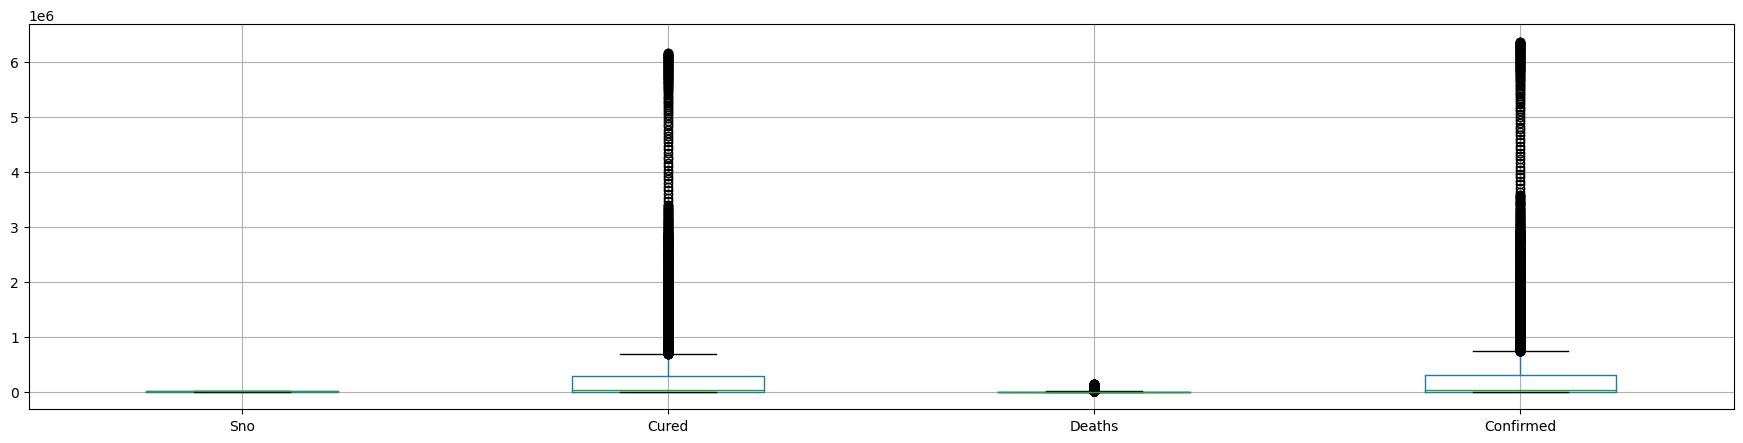

In [17]:
plt.figure(figsize=(22,5))
carona.boxplot()

<AxesSubplot:>

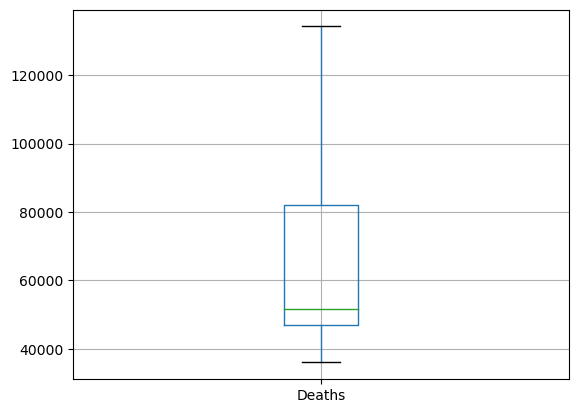

In [18]:
c1=carona[carona['Deaths']>36000]
c1.boxplot('Deaths')

<AxesSubplot:xlabel='state', ylabel='count'>

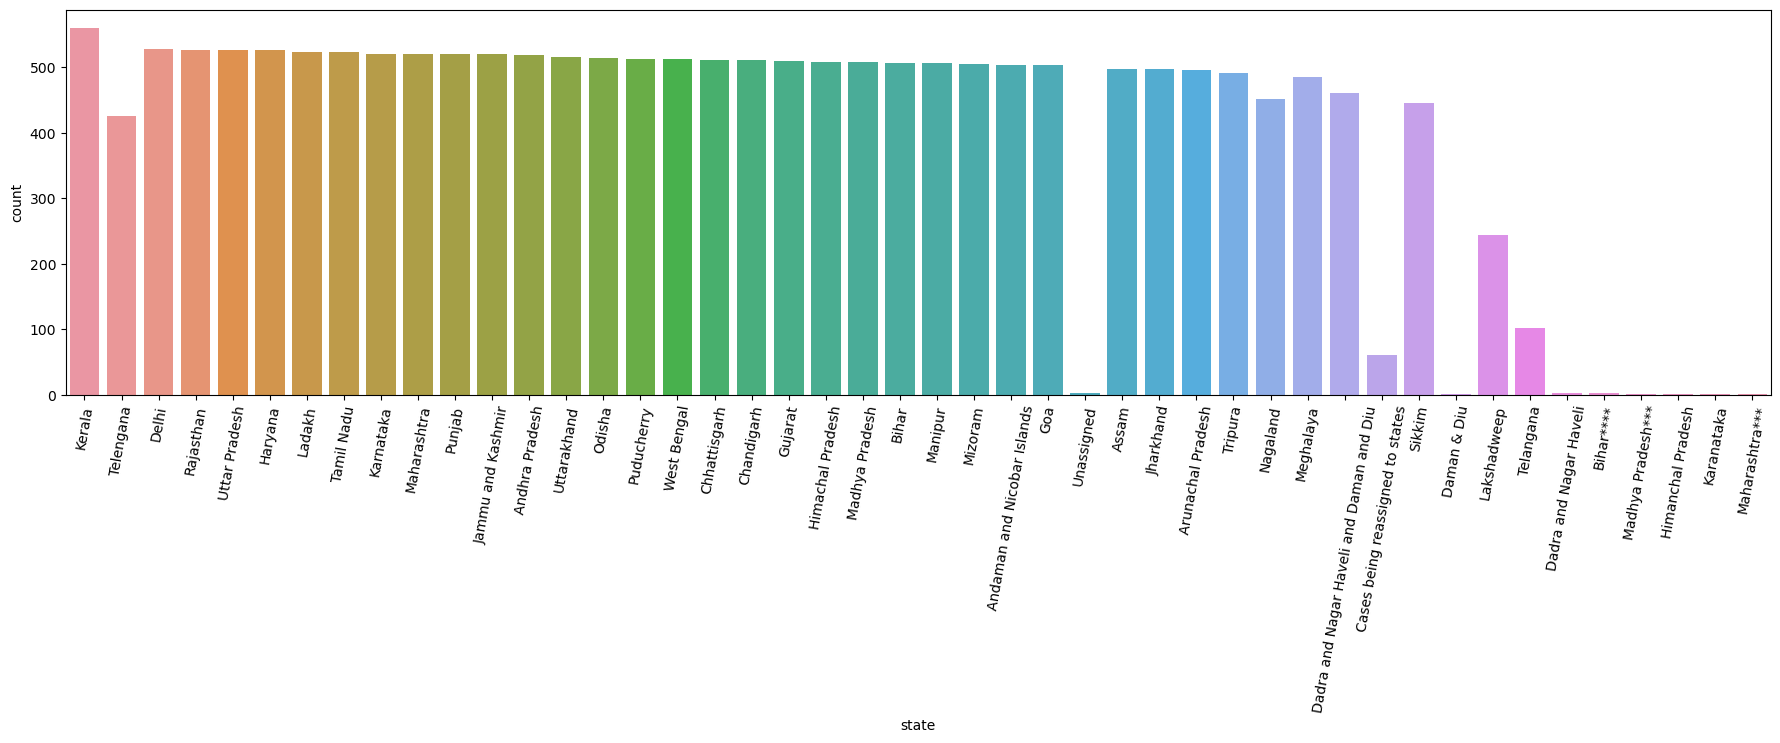

In [39]:
plt.figure(figsize=(22,5))
plt.xticks(rotation=80)
sns.countplot(x='state',data=carona)

<AxesSubplot:>

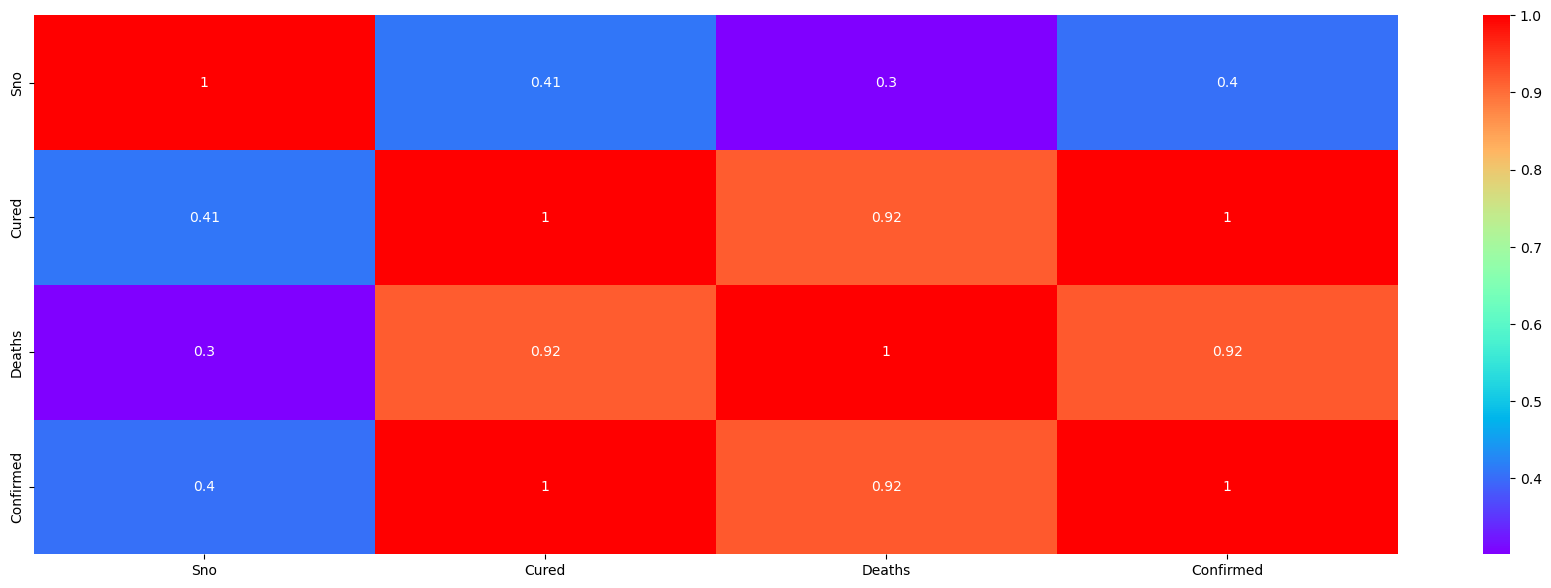

In [19]:
plt.figure(figsize=(22,7))
sns.heatmap(carona.corr(),cmap='rainbow',annot=True)

<AxesSubplot:xlabel='state', ylabel='Deaths'>

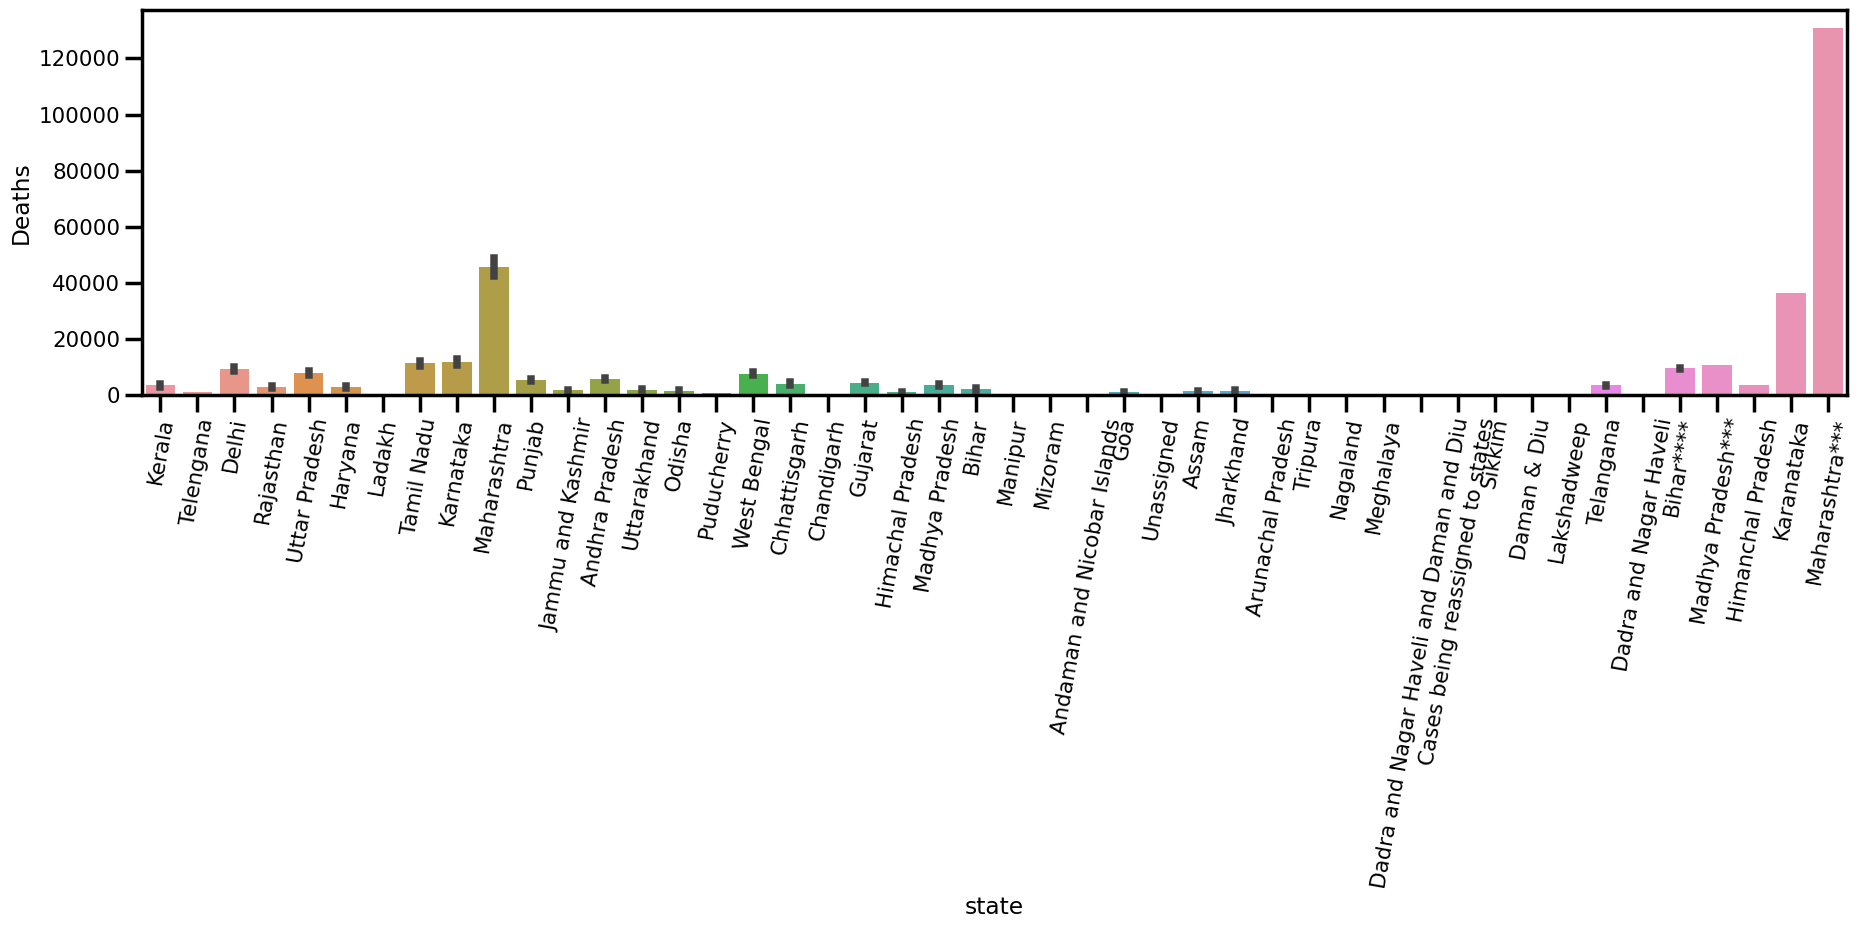

In [20]:
plt.figure(figsize=(22,5))
sns.set_context('poster',font_scale=(0.7))
plt.xticks(rotation=80)
sns.barplot(x='state',y='Deaths',data=carona)

<AxesSubplot:xlabel='state', ylabel='Cured'>

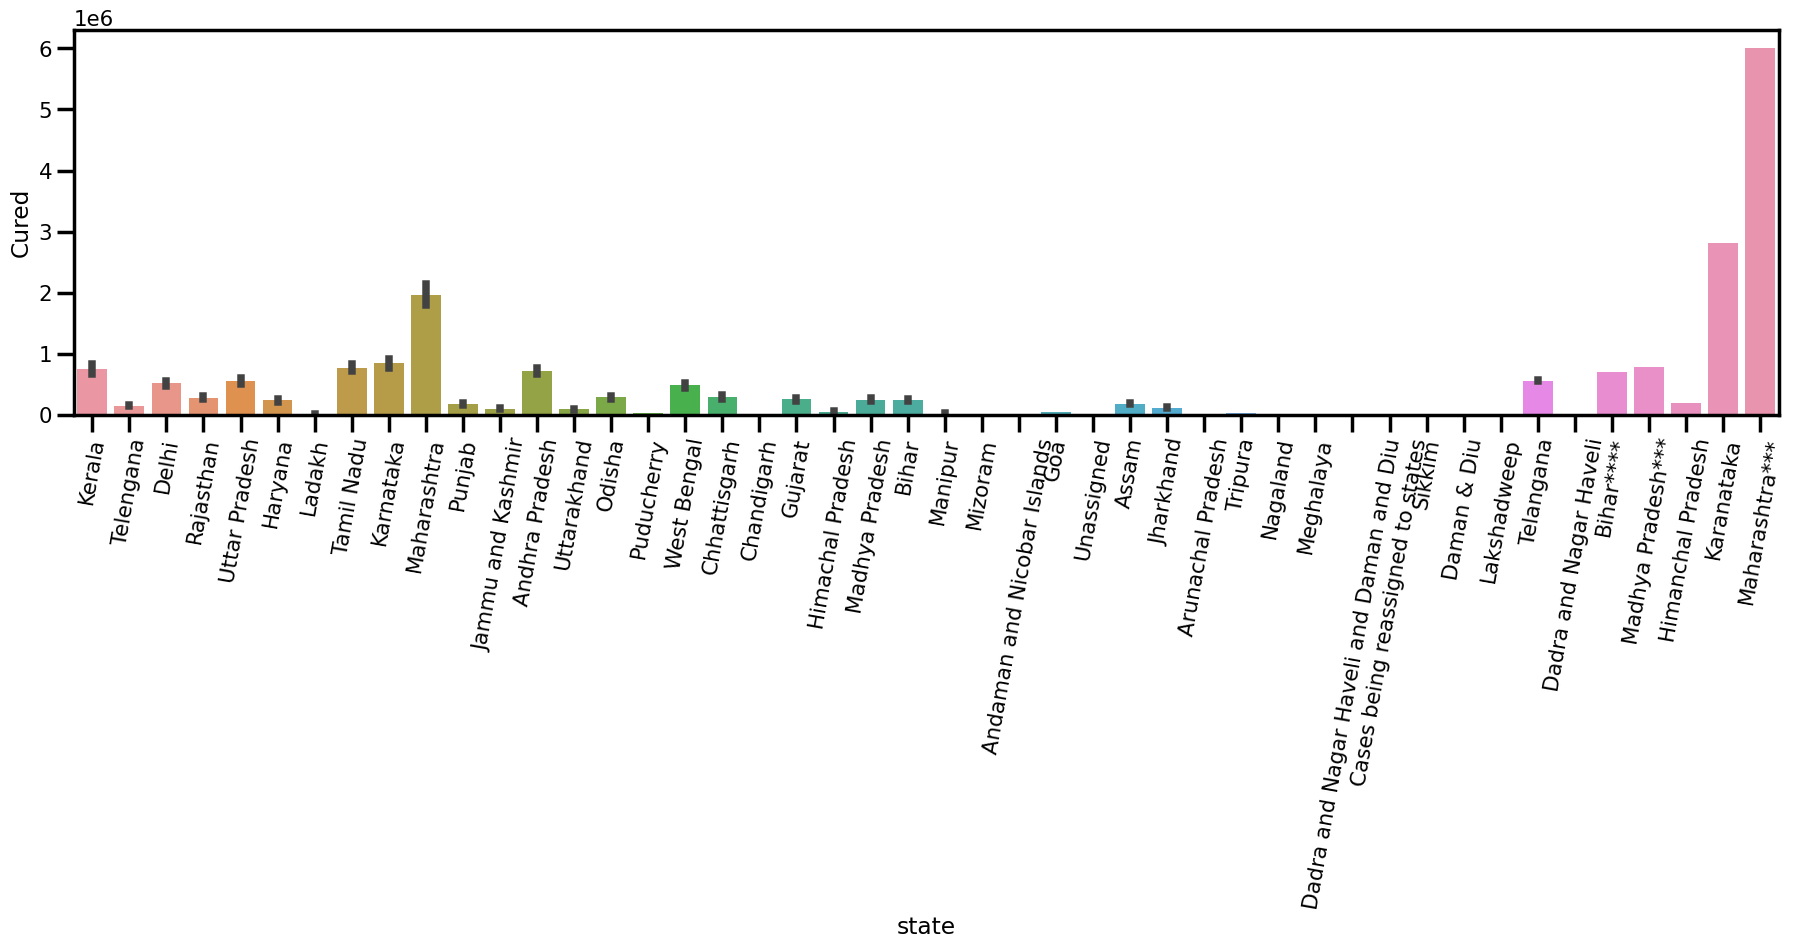

In [21]:
plt.figure(figsize=(22,5))
sns.set_context('poster',font_scale=(0.7))
plt.xticks(rotation=80)
sns.barplot(x='state',y='Cured',data=carona)


<AxesSubplot:xlabel='state', ylabel='Confirmed'>

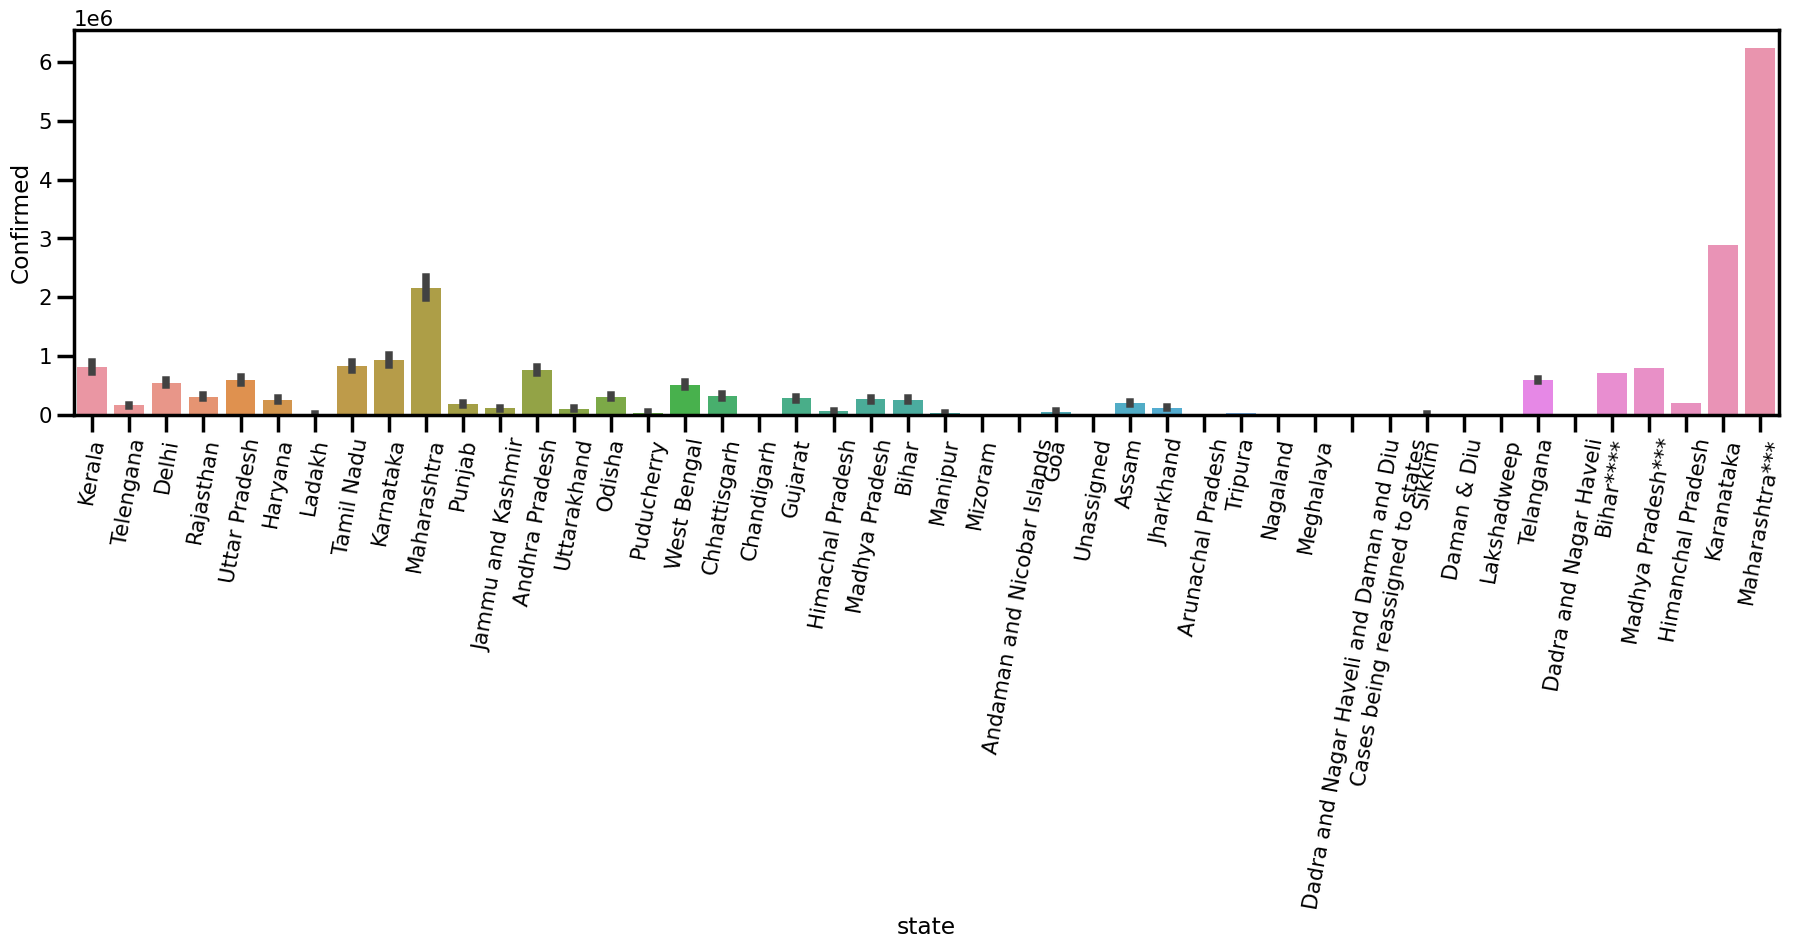

In [22]:
plt.figure(figsize=(22,5))
sns.set_context('poster',font_scale=(0.7))
plt.xticks(rotation=80)
sns.barplot(x='state',y='Confirmed',data=carona)

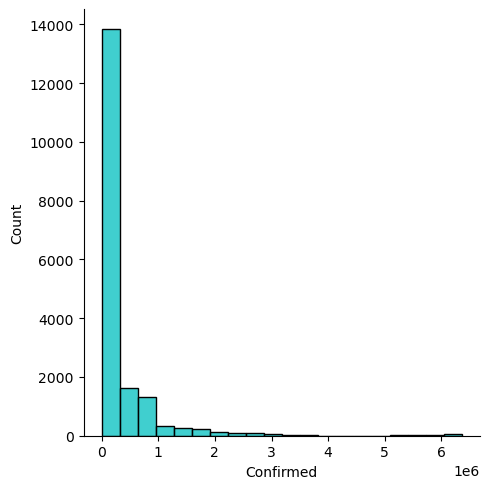

In [43]:
sns.displot(carona['Confirmed'],color='c',bins=20)

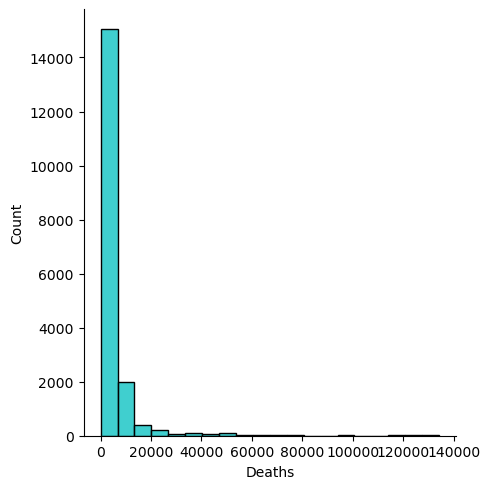

In [36]:
sns.displot(carona['Deaths'],color='c',bins=20)

<Figure size 2200x500 with 0 Axes>

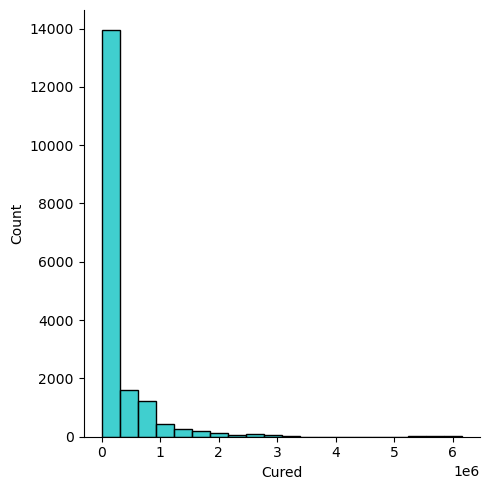

In [41]:
plt.figure(figsize=(22,5))
sns.displot(carona['Cured'],color='c',bins=20)

# KERALA STATE

In [15]:
carona1=carona[carona['state']=='Kerala']

<AxesSubplot:xlabel='state', ylabel='Deaths'>

<Figure size 2200x500 with 0 Axes>

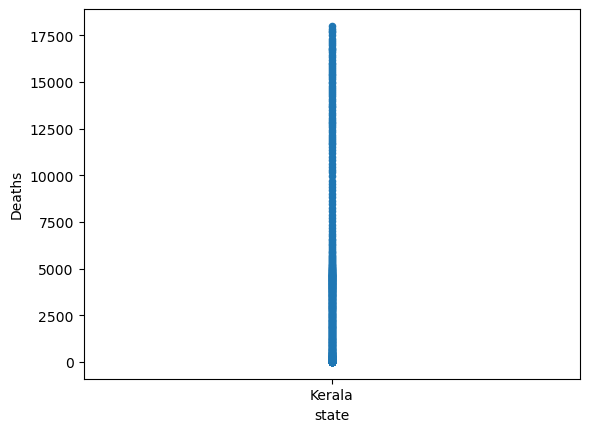

In [16]:
plt.figure(figsize=(22,5))
carona1.plot(kind='scatter',x='state',y='Deaths')

<AxesSubplot:xlabel='state', ylabel='Cured'>

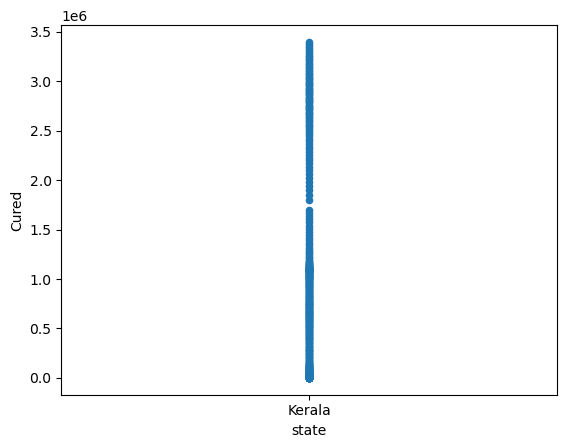

In [17]:
carona1.plot(kind='scatter',x='state',y='Cured')

<AxesSubplot:xlabel='state', ylabel='Confirmed'>

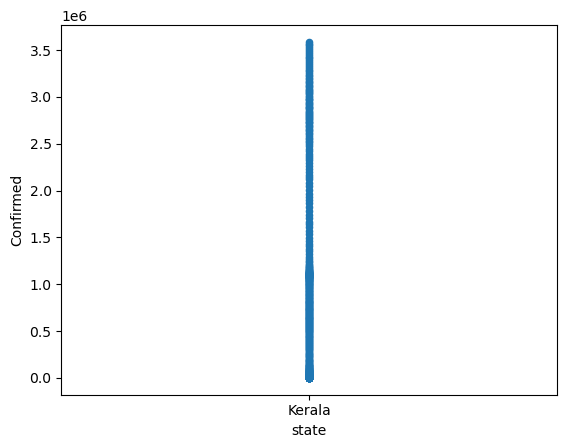

In [20]:
carona1.plot(kind='scatter',x='state',y='Confirmed')

# MAHARASHTRA

In [29]:
c2=carona[carona['state']=='Maharashtra']

<AxesSubplot:xlabel='state', ylabel='Cured'>

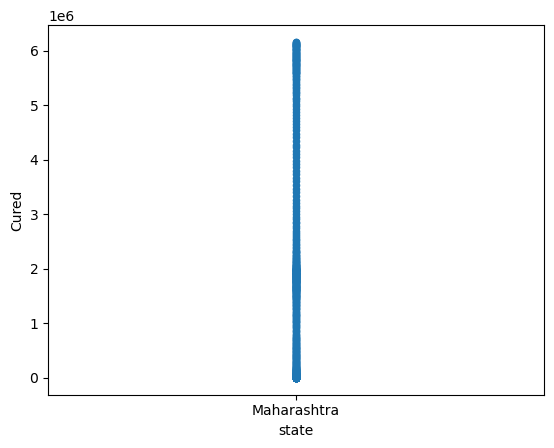

In [30]:
c2.plot(kind='scatter',x='state',y='Cured')

<AxesSubplot:xlabel='state', ylabel='Confirmed'>

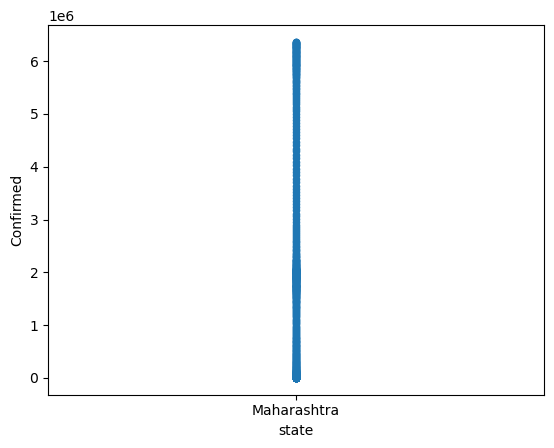

In [31]:
c2.plot(kind='scatter',x='state',y='Confirmed')

<AxesSubplot:xlabel='state', ylabel='Deaths'>

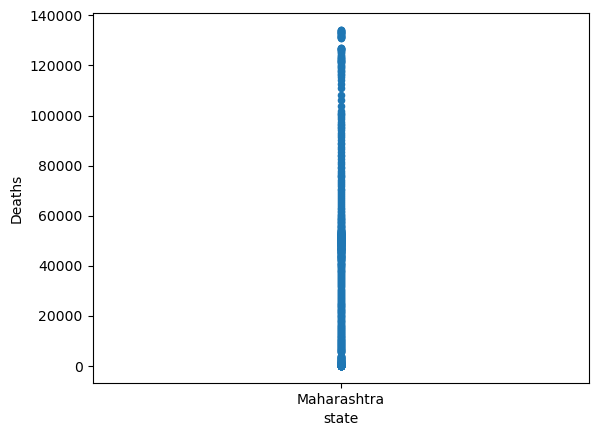

In [32]:
c2.plot(kind='scatter',x='state',y='Deaths')

In [25]:
carona1

,Sno,Date,Time,state,Cured,Deaths,Confirmed
0,1,1/30/2020,6:00 PM,Kerala,0,0,1
1,2,1/31/2020,6:00 PM,Kerala,0,0,1
2,3,2/1/2020,6:00 PM,Kerala,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,0,0,3
4,5,2/3/2020,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...,...
17946,17947,8/7/2021,8:00 AM,Kerala,3317314,17515,3513551
17982,17983,8/8/2021,8:00 AM,Kerala,3337579,17654,3533918
18018,18019,8/9/2021,8:00 AM,Kerala,3357687,17747,3552525
18054,18055,8/10/2021,8:00 AM,Kerala,3377691,17852,3565574
